# **Hugging Face**

## **1. Zero-Shot-Classification**

In [1]:
!pip install Transformers

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from transformers import pipeline
from pylab import rcParams

In [3]:
rcParams['figure.figsize'] = 10, 5

In [4]:
zero_shot_classifier = pipeline('zero-shot-classification')

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [27]:
result = zero_shot_classifier(
    sequences = 'can you order some pizza?I am going to cinema by car',
    candidate_labels = ['food','flight','travel','fast food','Movies','unhealthy'],
    multi_label = True
)

In [28]:
result

{'sequence': 'can you order some pizza?I am going to cinema by car',
 'labels': ['food', 'fast food', 'travel', 'Movies', 'unhealthy', 'flight'],
 'scores': [0.9714112877845764,
  0.9639098048210144,
  0.939710259437561,
  0.28727012872695923,
  0.14244584739208221,
  0.0007443909998983145]}

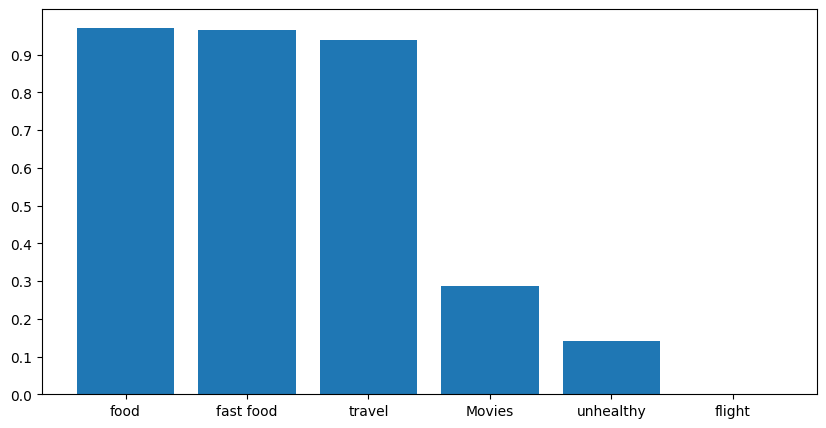

In [29]:
plt.bar(result['labels'],result['scores'])
plt.yticks(list(np.arange(0,1,0.1)))
plt.show()

# **2. Audio to Text**

In [49]:
#Playing the audio file

from IPython.display import Audio
from scipy.io import wavfile

In [50]:
file_name = '/content/Thank you for contac.wav'
Audio(file_name)

**Generating Text from Audio**

In [51]:
import soundfile as sf #reading and writing audio files.
import librosa  # music and audio analysis
import torch
from transformers import Wav2Vec2ForCTC, Wav2Vec2Tokenizer

tokenizer = Wav2Vec2Tokenizer.from_pretrained('facebook/wav2vec2-base-960h')
model = Wav2Vec2ForCTC.from_pretrained('facebook/wav2vec2-base-960h')

print(tokenizer, model)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'Wav2Vec2CTCTokenizer'. 
The class this function is called from is 'Wav2Vec2Tokenizer'.
/usr/local/lib/python3.10/dist-packages/transformers/models/wav2vec2/tokenization_wav2vec2.py:733: FutureWarning: The class `Wav2Vec2Tokenizer` is deprecated and will be removed in version 5 of Transformers. Please use `Wav2Vec2Processor` or `Wav2Vec2CTCTokenizer` instead.
  warnings.warn(
Some weights of the model checkpoint at facebook/wav2vec2-base-960h were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification mod

Wav2Vec2Tokenizer(name_or_path='facebook/wav2vec2-base-960h', vocab_size=32, model_max_length=1000000000000000019884624838656, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'pad_token': '<pad>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
} Wav2Vec2ForCTC(
  (wav2vec2): Wav2Vec2Model(
    (feature_extractor): Wav2Vec2FeatureEncoder(
      (conv_layers): ModuleList(
        (0): Wav2Vec2GroupNormConvLayer(
          (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,), b

In [52]:
input_audio, _ = librosa.load(file_name, sr = 16000) #sr - sampling rate
input_audio

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [53]:
input_values = tokenizer(input_audio, return_tensors= "pt").input_values
logits = model(input_values).logits
predicted_ids = torch.argmax(logits, dim = -1)
transcription = tokenizer.batch_decode(predicted_ids)[0]
print(transcription)

THANK YOU FOR CONTACTING US ALL LINES ARE CURRENTLY BUSY YOUR CALL IS VERY IMPORTANT TO US
